# Exercise 1: Linear Regression

### This notebook is executed automatically. Failure to comply with the following instructions will result in a massive penalty. Appeals regarding your failure to read the following instructions will be denied. Kindly reminder: the homework assignments grade is 50% of the final grade. 

### Do not start the exercise until you fully understand the submission guidelines.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
2. Preprocess the data for linear regression.
3. Compute the cost and perform gradient descent in pure numpy in vectorized form.
4. Fit a linear regression model using a single feature.
5. Visualize your results using matplotlib.
6. Perform multivariate linear regression.
7. Pick the best three features in the dataset.


# I have read and understood the instructions: 309797827_305494452

In [1]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### Part 1: Data Preprocessing (10 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [2]:
# Read comma separated data
df = pd.read_csv('data.csv') # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [3]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [5]:
X = np.array(df['sqft_living'].values)
y = np.array(df['price'].values)

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

Implement the cost function `preprocess`.

In [6]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    ###########################################################################
    # TODO: Implement the normalization function.                             #
    ###########################################################################
     # Convert to float type
    X = X.astype('float64')
    y = y.astype('float64')
    # Normalize the data
    X_mean = X.mean(axis = 0)
    X_min = X.min(axis = 0)
    X_max = X.max(axis = 0)
    X = (X - X_mean) / (X_max - X_min) 
    y = (y - y.mean()) / (y.max() - y.min()) 
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return X, y

In [7]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [8]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

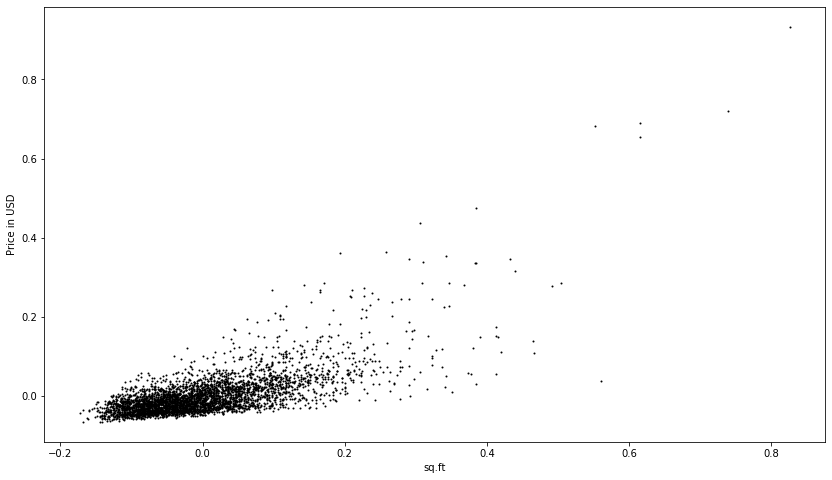

In [9]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zeroth column of the features (do this for both the training and validation sets).

In [10]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
# Bias trick for all data and train,val split
npArrayXofOnes = np.ones(len(X))
npArrayXTrainofOnes = np.ones(len(X_train))
npArrayXValofOnes = np.ones(len(X_val))
X = np.column_stack((npArrayXofOnes, X))
X_val = np.column_stack((npArrayXValofOnes,X_val))
X_train = np.column_stack((npArrayXTrainofOnes,X_train))
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

## Part 2: Single Variable Linear Regression (40 Points)
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Implement the cost function `compute_cost`. (10 points)

In [11]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################
    # Calculate sum of distances from optimal function cost
    J = (np.sum(np.square(np.dot(X,theta)-y))/(2 * len(X))) 
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [12]:
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

Implement the gradient descent function `gradient_descent`. (10 points)

In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    instancesLen=len(y)
    J_history.append(compute_cost(X,y,theta))
    # Looking for theta that give the min of function and keep cost history
    for i in range (1, num_iters):
        sigma = np.dot((np.dot(X, theta) - y), X) / instancesLen
        theta = theta - alpha * sigma
        J_history.append(compute_cost(X, y, theta)) 
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

In [14]:
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

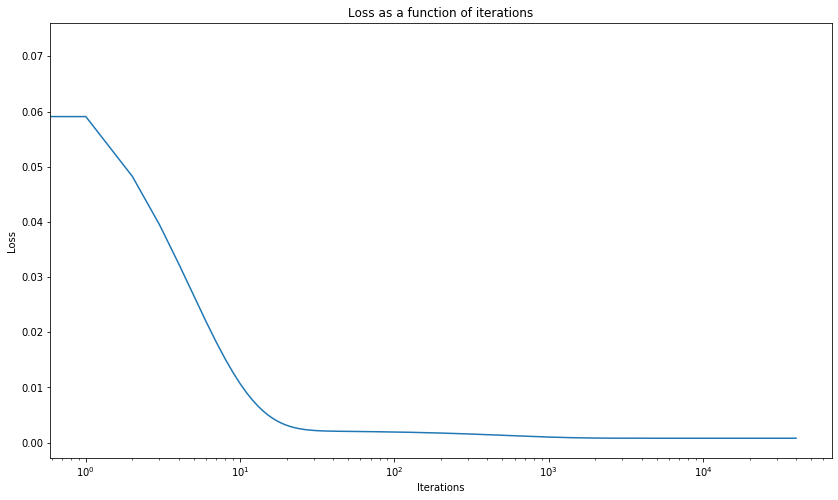

In [15]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

Implement the pseudo-inverse function `pinv`. **Do not use `np.linalg.pinv`**, instead use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`). (10 points)

In [16]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    pinv_theta = []
    ###########################################################################
    # TODO: Implement the pseudoinverse algorithm.                            #
    ###########################################################################
    # Looking for theta vector that give the min cost function by matrix multiplication
    Xpinv = np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T)
    pinv_theta = np.matmul(Xpinv, y)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_theta

In [17]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

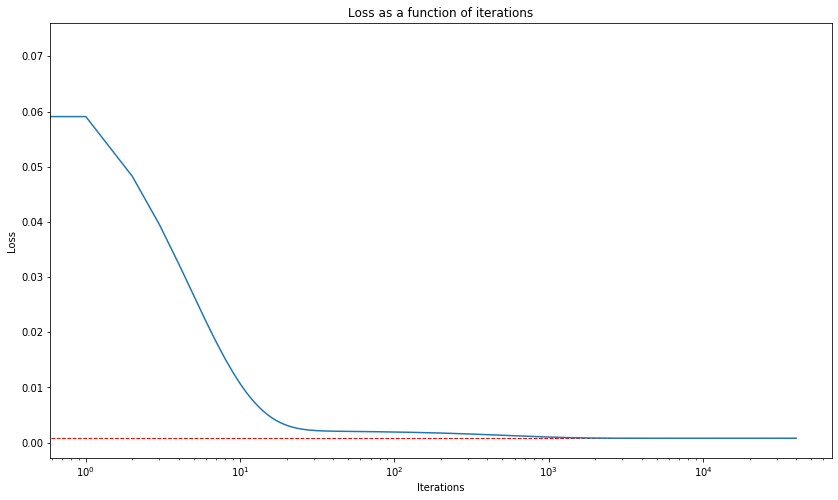

In [18]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color = 'r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. Implement the function `efficient_gradient_descent`. (5 points)

In [19]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    instancesLen = len(y)
    J_history.append(compute_cost(X,y,theta))
    # Looking for theta that give the min of function and keep cost history
    for i in range (1, num_iters):
        sigma = np.dot((np.dot(X,theta) - y), X) / instancesLen
        theta = theta - alpha * sigma
        J_history.append(compute_cost(X, y, theta)) # after each iteration append the cost functioin into the list
        # Finish the search if the improvment is not big enough
        if ((len(J_history) > 1) and (J_history[-2] - J_history[-1] < 1e-8)):
            break
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [20]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Start the examination from random theta
    np.random.seed(42)
    theta = np.random.rand(2)# theta to start with on each gradient_descent
    for alpha in alphas:
        J_history = []
        theta_final, J_history = efficient_gradient_descent(X_train, y_train, theta, alpha, iterations)# compute theta with a specific alpha from the list
        alpha_dict[alpha] = compute_cost(X_val, y_val, theta_final)# add the validation cost with the alpha to the dictonary
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return alpha_dict

In [21]:
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions.

In [22]:
best_alpha = None
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
# Get the best alpha
best_alpha = min(alpha_dict, key=alpha_dict.get)
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
print(best_alpha)

1


Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the training loss as a function of iterations (Use 10,000 iterations). Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. (5 points)

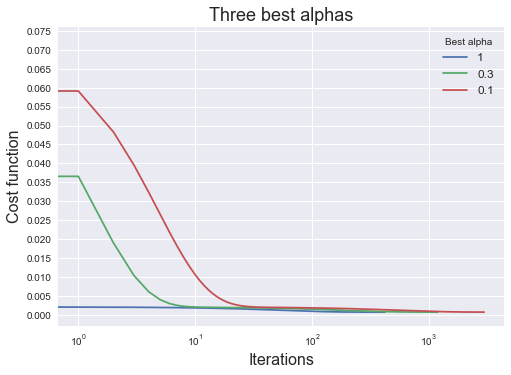

In [23]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
copy_dict = alpha_dict.copy()
best_alphas = np.empty(3)
num_iteration = 10000
plt.style.use('seaborn')
# Run on the 3 best alpha and create the lost graph, by efficient_gradient_descent function
for i in range(3):
    alpha = min(copy_dict, key=copy_dict.get)
    best_alphas[i] = alpha
    del copy_dict[alpha]
    np.random.seed(42)
    randomTheta = np.random.rand(2)
    thetaOfCurrenAlpha, J_history = efficient_gradient_descent(X_train, y_train, randomTheta, alpha, num_iteration)
    plt.plot(np.arange(len(J_history)),J_history, label = alpha)
    
plt.xscale('log')
plt.xlabel('Iterations',fontsize = '16')
plt.ylabel('Cost function', fontsize = '16')
plt.yticks(np.arange(0.08,step = 0.005))
plt.title ('Three best alphas', fontsize = '18')
plt.legend(loc = "upper right",fontsize = '12',title = 'Best alpha')
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

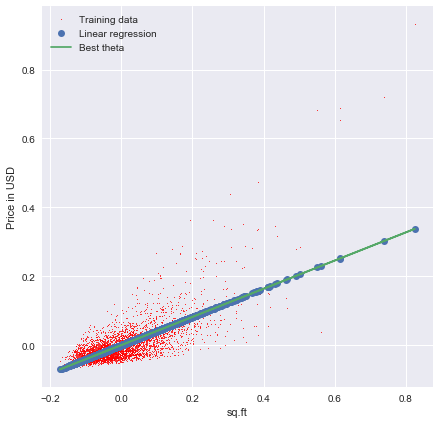

In [24]:
plt.figure(figsize = (7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms = 1, mec = 'k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, theta), 'o')
plt.plot(X_train[:, 1], np.dot(X_train, theta_pinv), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression (30 points)

In most cases, you will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote vectorized code, this part should be straightforward. If your code is not vectorized, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [25]:
# Read comma separated data
df = pd.read_csv('data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [26]:
X = df.drop(columns = ['price', 'id', 'date']).values
y = df['price'].values

Use the **same** `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [27]:
# preprocessing
X, y = preprocess(X, y)

In [28]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

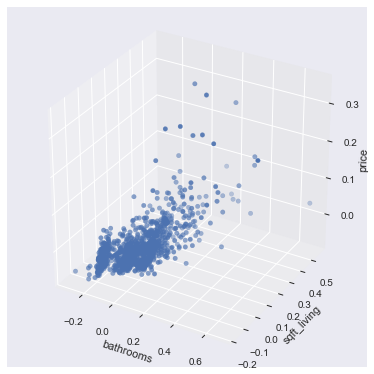

In [29]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [30]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
# Bias trick for train,val data split
npArrayXTrainofOnes = np.ones(len(X_train))
npArrayXValofOnes = np.ones(len(X_val))
X_val = np.column_stack((npArrayXValofOnes,X_val))
X_train = np.column_stack((npArrayXTrainofOnes,X_train))
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Make sure the functions `compute_cost` (10 points), `gradient_descent` (15 points), and `pinv` (5 points) work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model. 

In [31]:
shape = X_train.shape[1]
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

In [32]:
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

In [33]:
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

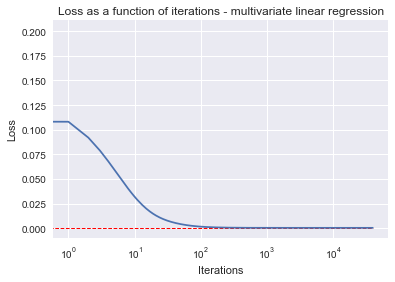

In [34]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color ='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

## Part 3: Find best features for regression (20 points)

Adding additional features to our regression model makes it more complicated but does not necessarily improves performance. Find the combination of two features that best minimizes the loss. First, we will reload the dataset as a dataframe in order to access the feature names. Use the dataframe with the relevant features as the input to the `generate_couples` and obtain a list of all possible feature couples.

In [35]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns = columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
import itertools

def generate_couples(features):
    """
    generate all possible sets of two features out of all relevant features
    available from the given dataset X. Hint: check out the python package
    'itertools'.

    Input:
    - features: a dataframe that contains all relevant features.

    Returns:
    - A python list containing all feature couples.
    """
    
    couples = []
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Create list of all the possible feature couples
    couples=list(itertools.combinations(features,2))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return couples

In [37]:
couples = generate_couples(all_features)
print("Number of couples: {}".format(len(couples)))

Number of couples: 136


Complete the function `find_best_couple`. You are free to use any arguments you need.

In [38]:
def find_best_couple(couples,X,y,alpha,idx_train,idx_val,NumberOfiterations):
    """
    Iterate over all possible couples and obtain the learned parameters 
    theta by using the training set. Find the couple that minimizes the
    error on the validation set. For better performance, you should use the 
    efficient implementation of gradient descent. Don't forget the bias trick.

    Returns:
    - The names of the best features.
    """
    best_couples = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Start the examination from random theta
    np.random.seed(42)
    randomTheta = np.random.random(size = 3)    
    # preprocessing
    X, y = preprocess(X,y)    
     
    for i in couples:        
        currentCoupleValues=X[[i[0],i[1]]].values
        # Couple training and validation split      
        XCouple_train, XCouple_val = currentCoupleValues[idx_train], currentCoupleValues[idx_val]
        yCouple_train, yCouple_val = y[idx_train], y[idx_val]
        # Bias Trick
        npArrayXTrainOfOnes = np.ones(len(XCouple_train))
        currentCoupleXTrainValues = np.column_stack((npArrayXTrainOfOnes,XCouple_train))    
        npArrayXValOfOnes = np.ones(len(XCouple_val))
        currentCoupleXValValues = np.column_stack((npArrayXValOfOnes,XCouple_val))
        # Find best theta for the current couple on the training set       
        currentTheta, jCostHistory = efficient_gradient_descent(currentCoupleXTrainValues, yCouple_train, randomTheta, alpha, NumberOfiterations)
        # Get the J cost of the couple according to the best theta on the training set
        currentCost = compute_cost(currentCoupleXValValues,yCouple_val,currentTheta)
        # Keep current best feature couple
        if(best_couples == None):
            minJCost = currentCost
            best_couples = i            
        elif(currentCost < minJCost):
            best_couples = i
            minJCost = currentCost            
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ########################################################################### 
    return best_couples

In [39]:
find_best_couple(couples,all_features,y,best_alpha,idx_train,idx_val,10000)

('sqft_living', 'lat')

### Backward Feature Selection

Complete the function `backward_selection`. Train the model with all but one of the features at a time and remove the worst feature. Next, remove an additional feature along the feature you previously removed. Repeat this process until you reach two features + bias. You are free to use any arguments you need.

In [40]:
def backward_selection(all_features,y,alpha,idx_train,idx_val,NumberOfIterations):
    """
    Train the model using the training set using all but one of the 
    features at a time. Remove the worst feature according to the 
    validation set. Next, remove an additional feature along the feature
    you previously removed. Repeat this process until you reach two features
    and the bias. Don't forget the bias trick.

    Returns:
    - The names of the best features.
    """
    np.random.seed(42)
    best_couples = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # preprocessing
    X=all_features.to_numpy()
    X, y = preprocess(X,y)
    # training and validation split    
    X_train, X_val = X[idx_train], X[idx_val]
    y_train, y_val = y[idx_train], y[idx_val]
    # Bias trick
    npArrayXTrainofOnes = np.ones(len(X_train))
    X_train = np.column_stack((npArrayXTrainofOnes,X_train))
    npArrayXValofOnes = np.ones(len(X_val))
    X_val = np.column_stack((npArrayXValofOnes,X_val))
    # initialize features list
    featureList = (list(all_features.columns.values))
    for i in range(len(X_train[1,:]),3,-1):
        # initialize current worst feature and his cost
        worstFeature = None
        worstCost = None
        # Start the examination from random theta
        randomTheta = np.random.random(size = i - 1)
        # Looking for worst feature to giveup on
        for j in range(1,len(X_train[1,:])):
            # Temporarily delete the j feature
            currentXTrainWithoutJ = np.delete(X_train, j, 1)
            currentXValWithoutJ = np.delete(X_val, j, 1)
            # Find best theta for the current training set without j featrue    
            currentTheta, jCostHistory = efficient_gradient_descent(currentXTrainWithoutJ, y_train, randomTheta, alpha, NumberOfIterations)
            # Get the J cost of the val set according to the best theta on the training set
            newWorstCost = compute_cost(currentXValWithoutJ, y_val, currentTheta)
            # Keep current worst feature (name, J cost and location)
            if((worstFeature == None)or(newWorstCost<worstCost)):
                worstFeature = j
                worstCost = newWorstCost
                worstFeatureName = featureList[j-1]
        # Remove the worst feature that found on last iteration from train and val sets
        X_train = np.delete(X_train, worstFeature, 1)
        X_val = np.delete(X_val, worstFeature, 1)
        featureList.remove(worstFeatureName)        
    best_couples = featureList
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return best_couples

In [41]:
backward_selection(all_features,y,best_alpha,idx_train,idx_val,10000)

['sqft_living', 'lat']

Give an explanations to the results. Do they make sense? How could you further improve this linear regression model?

התשובה הגיונית שכן מיקום וגודל הבתים הינו פקטור מאוד משמעותי למחיר הבית 
נחלק את המשך תשובתנו לשני חלקים:
1.נסביר מדוע תוצאות ההחזרה של שתי הפונקציות couple_best_find  ו- selection_backward במודל שעליו ביצענו את התרגיל יחזירו
תמיד את אותו ערך החזרה (במידה ונרוץ על אותה פרומטציה של דאטא)שהינו זוג הפי'צרים הטוב ביותר ['sqft_living', 'lat']
נסביר, כמובן שערך ההחזרה של הפונקציה couple_best_find תחזיר בהכרח את הזוג המיטבי, קרי הזוג שיחזיר את פונקציית הטעות המינמלית ביותר על validation data.
כיוון שלמעשה אנו בודקים את כל האפשרויות לזוגות.
כעת נסביר מדוע פונקציית selection_backward בהכרח תחזיר גם היא את הזוג המיטבי. 
כיוון שאנו עוברים על כל האפשרויות בכל איטרציה כך שבכל איטרציה אנו בודקים את הקבוצות השונות של כל הפי'צרים הנותרים למעט פי'צר אחד.
בכל שלב כזה אנו מוותרים על הפי'צר שמוסיף את סכום טעויות המרחקים הגדול ביותר אל מול data valdiation. 
בחירה גרידית זו בהכרח תוביל אותנו אל הזוג המיטבי מכיוון שהפי'צר עליו אנו רוצים לוותר בכל שלב הוא יוסיף את סכום המרחקים הגדול ביותר ביחס לשאר הפי'צרים.
לכן בסיום התהליך נישאר עם הזוג הטוב ביותר.
2.הצעתנו לייעול הרגרסיה הלינארית הינה להחליט על מספר קבוע כלשהו של פי'צרים שעליהם נבצע תהליך הרגרסיה הלינארית אשר יכלול את הפי'צרים הטובים בלבד.
הצעה זו למעשה מנקה את הרעשים שיכולים להיווצר מפי'צרים אשר תרומתם קטנה / מזיקה לדיוק המודל.
באופן זה תהליך הלמידה יתקצר באופן משמעותי (לדוגמא: במודל בעל 100 פ'יצרים בחירת קבוע של 20 ייעל את המודל בסדר גודל של פי 5)
